# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [50]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [51]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [52]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,231
Treatment,167


col_0,Frequency
status,
Control,0.580402
Treatment,0.419598


<font size = "5">

Query with string conditions

In [53]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [54]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,23.368862,5.520958,199.341317,2977.754491,15.191018
std,7.994470,1.734964,109.878233,879.695124,2.655769
min,11.000000,3.000000,68.000000,1649.000000,8.000000
25%,16.000000,4.000000,98.000000,2220.500000,13.500000
50%,22.000000,4.000000,140.000000,2720.000000,15.100000
75%,29.900000,8.000000,303.000000,3742.500000,16.900000
max,44.600000,8.000000,454.000000,4997.000000,23.500000


,mpg,cylinders,displacement,weight,acceleration
count,231.000000,231.000000,231.000000,231.000000,231.000000
mean,23.619913,5.406926,189.151515,2965.125541,15.840693
std,7.700127,1.678183,100.042332,824.168016,2.803257
min,9.000000,3.000000,70.000000,1613.000000,8.500000
25%,18.000000,4.000000,105.000000,2225.500000,14.000000
50%,23.000000,4.000000,151.000000,2815.000000,15.700000
75%,28.600000,6.000000,258.000000,3514.500000,17.700000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [55]:
def fn_checkmpg (mpg):
    if (mpg>18):
        status = "mpg is greater than 18"
    else: 
        status = "mpg is less than 18"
    return(status)

carfeatures["mpg threshold"] = carfeatures["mpg"].apply(fn_checkmpg)
display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,mpg threshold
0,18.0,8,307,130,3504,12.0,C-1689780,Control,mpg is less than 18
1,15.0,8,350,165,3693,11.5,B-1689791,Control,mpg is less than 18
2,18.0,8,318,150,3436,11.0,P-1689802,Control,mpg is less than 18
3,16.0,8,304,150,3433,12.0,A-1689813,Control,mpg is less than 18
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment,mpg is less than 18
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment,mpg is greater than 18
394,44.0,4,97,52,2130,24.6,V-1694114,Control,mpg is greater than 18
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment,mpg is greater than 18
396,28.0,4,120,79,2625,18.6,F-1694136,Control,mpg is greater than 18


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [56]:
mean_mpg = carfeatures["mpg"].mean()
display(mean_mpg)
median_mpg = carfeatures["mpg"].median()
display(median_mpg)
max_mpg = carfeatures["mpg"].max()
min_mpg = carfeatures["mpg"].min()

data_mpg_subset1 = carfeatures.query("(mpg==@mean_mpg) | (mpg==@median_mpg)")
display(data_mpg_subset1)
data_mpg_subset2 = carfeatures.query("(mpg==@max_mpg) | (mpg==@min_mpg)")  #max and min
data_mpg_subset2 = carfeatures.query("(mpg!=@max_mpg) & (mpg!=@min_mpg)")  #everything but the max and min
data_mpg_subset3 = carfeatures.query("(mpg>@mean_mpg) & (mpg==@median_mpg)")




23.514572864321607

23.0

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,mpg threshold
49,23.0,4,122,86,2220,14.0,M-1690319,Control,mpg is greater than 18
59,23.0,4,97,54,2254,23.5,V-1690429,Treatment,mpg is greater than 18
82,23.0,4,120,97,2506,14.5,T-1690682,Treatment,mpg is greater than 18
101,23.0,6,198,95,2904,16.0,P-1690891,Control,mpg is greater than 18
168,23.0,4,140,83,2639,17.0,F-1691628,Treatment,mpg is greater than 18
170,23.0,4,140,78,2592,18.5,P-1691650,Control,mpg is greater than 18
177,23.0,4,115,95,2694,15.0,A-1691727,Control,mpg is greater than 18
178,23.0,4,120,88,2957,17.0,P-1691738,Control,mpg is greater than 18
298,23.0,8,350,125,3900,17.4,C-1693058,Treatment,mpg is greater than 18
374,23.0,4,151,?,3035,20.5,A-1693894,Control,mpg is greater than 18


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [57]:
mpg_ascending = carfeatures.sort_values(by= "mpg", ascending= False)

display(mpg_ascending.iloc[0:5,:])

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,mpg threshold
322,46.6,4,86,65,2110,17.9,M-1693322,Control,mpg is greater than 18
329,44.6,4,91,67,1850,13.8,H-1693399,Treatment,mpg is greater than 18
325,44.3,4,90,48,2085,21.7,V-1693355,Treatment,mpg is greater than 18
394,44.0,4,97,52,2130,24.6,V-1694114,Control,mpg is greater than 18
326,43.4,4,90,48,2335,23.7,V-1693366,Control,mpg is greater than 18


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [58]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)


carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,mpg threshold
0,18.0,8,307,130,3504,12.0,C-1689780,Control,mpg is less than 18
1,15.0,8,350,165,3693,11.5,B-1689791,Control,mpg is less than 18
2,18.0,8,318,150,3436,11.0,P-1689802,Control,mpg is less than 18
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,mpg is less than 18
4,17.0,8,302,140,3449,10.5,F-1689824,Control,mpg is less than 18
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,mpg is greater than 18
394,44.0,4,97,52,2130,24.6,V-1694114,Control,mpg is greater than 18
395,32.0,4,135,84,2295,11.6,D-1694125,Control,mpg is greater than 18
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment,mpg is greater than 18


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [59]:
def fn_arithmetic_operations (y,x, b0,b1):
    z = (x**y) + (b0+carfeatures["age"].median()+b1)

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

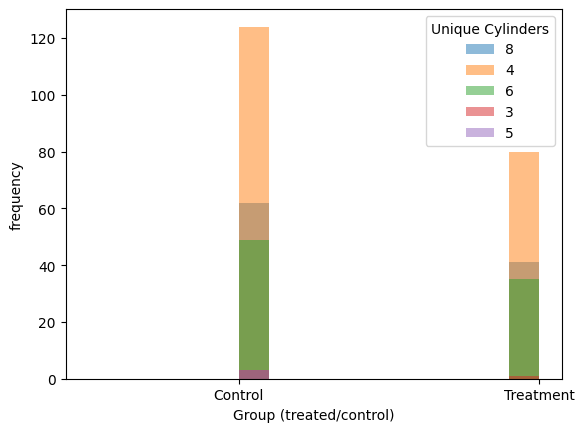

In [60]:
list_unique_cyl = pd.unique(carfeatures["cylinders"])

for category in list_unique_cyl:
    temp_df   = carfeatures.query("cylinders == @category") 
    plt.hist(x = temp_df["status"], alpha = 0.5)
    
plt.xlabel("Group (treated/control)")
plt.ylabel("frequency")
plt.legend(labels = list_unique_cyl,
           title  = "Unique Cylinders")
plt.show()